In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import json

## bring from go

In [2]:
# path_to_results = '/home/harhrayr/time-corex/time-varying-corex/results'
# files = [
#     'syn_nglf_buckets.nt10.m32.bs4.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
#     'syn_nglf_ts.nt30.m8.bs16.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
# ]
# full_paths = [os.path.join(path_to_results, x) for x in files]
# for f in full_paths:
#     os.system('scp harhrayr@go.yerevann.com:{} transfered_results/'.format(f))

In [12]:
def visualize_case(files, title):
    datas = []
    sizes = [2**(3+i) for i in range(len(files))]

    for ns in sizes:
        found = None
        for path in files:
            if 'train_cnt{}'.format(ns) in path:
                found = path
        with open(found, 'r') as f:
            data = json.load(f)
            datas.append(data)
    plt.figure(figsize=(9,7))
    keys = sorted(datas[0].keys())
    legend = []
    for k in keys:
        mas = [data[k]['mean'] for data in datas]
#         if k in ['Ground Truth', 'Time-Varying GLASSO', 'Linear CorEx', 'Time-Varying Linear CorEx (W)',
#                  'Time-Varying Linear CorEx with Priors (W, method 1)', 'Time-Varying Linear CorEx with Priors (W, method 2)',
#                  'Time-Varying Linear CorEx with Priors (W, weights only)',
#                  'Time-Varying Linear CorEx with Priors (W, weights)',
#                  'Time-Varying Linear CorEx with Priors (W, weights only, no init)']:
#         #if k in ['Ground Truth', 'Linear CorEx', 'Graphical LASSO', 'Diagonal'] or ('Time' in k):
        if k in ['Ground Truth', 'T-GLASSO',
                 'Linear CorEx (applied bucket-wise)',
                 # 'Linear CorEx (applied on whole data)',
                 'T-Corex (W)',
                 'T-Corex + priors (W, method 1)',
                 'T-Corex + priors (W, method 2)',
                 'T-Corex + priors (W, method 2, weighted samples)',
                 'T-Corex (W, weighted samples)',
                 'T-Corex (W, weighted samples, no init)'
                ]:
            legend.append(k)
            plt.plot(mas)
    plt.legend(legend)
    plt.xticks(range(len(sizes)), sizes)
    plt.title(title)
    plt.show()

In [13]:
def bar_plot_baselines(jsonfile, title):
    with open(jsonfile) as f:
        data = json.load(f)
    keys = data.keys()
    keys = sorted(keys)
    plt.figure(figsize=(9,7))
    values = [data[k]['mean'] for k in keys]
    values = [0 if np.isinf(x) else x for x in values]
    plt.bar(range(len(keys)), values, width=0.6)
    plt.ylim(0.9*data['Ground Truth']['mean'])
    plt.xticks(range(len(keys)), keys, rotation=90)
    for i, v in enumerate(values):
        plt.text(i - 0.4, v+1, '{:.2f}'.format(v))
    plt.tight_layout()
    plt.title(title)
    plt.subplots_adjust(top=0.9)
    plt.show()
        

In [14]:
A1_C1 = [
    'results/syn_nglf_buckets.nt10.m8.bs16.train_cnt16.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m8.bs16.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m8.bs16.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m8.bs16.train_cnt64.val_cnt16.test_cnt100.snr5.00.results.json'
]

In [15]:
A2_C1 = [
    'results/syn_nglf_buckets.nt10.m32.bs4.train_cnt16.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m32.bs4.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m32.bs4.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m32.bs4.train_cnt64.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m32.bs4.train_cnt128.val_cnt16.test_cnt100.snr5.00.results.json'
]

In [16]:
A3_C1 = [
    'results/syn_nglf_buckets.nt10.m4.bs32.train_cnt16.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m4.bs32.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_buckets.nt10.m4.bs32.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json'
]

In [17]:
A1_C3 = [
    'results/syn_nglf_ts.nt30.m8.bs16.train_cnt16.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_ts.nt30.m8.bs16.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_ts.nt30.m8.bs16.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json'
]

In [18]:
A2_C3 = [
    'results/syn_nglf_ts.nt30.m32.bs4.train_cnt16.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_ts.nt30.m32.bs4.train_cnt32.val_cnt16.test_cnt100.snr5.00.results.json',
    'results/syn_nglf_ts.nt30.m32.bs4.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json'
]

<IPython.core.display.Javascript object>


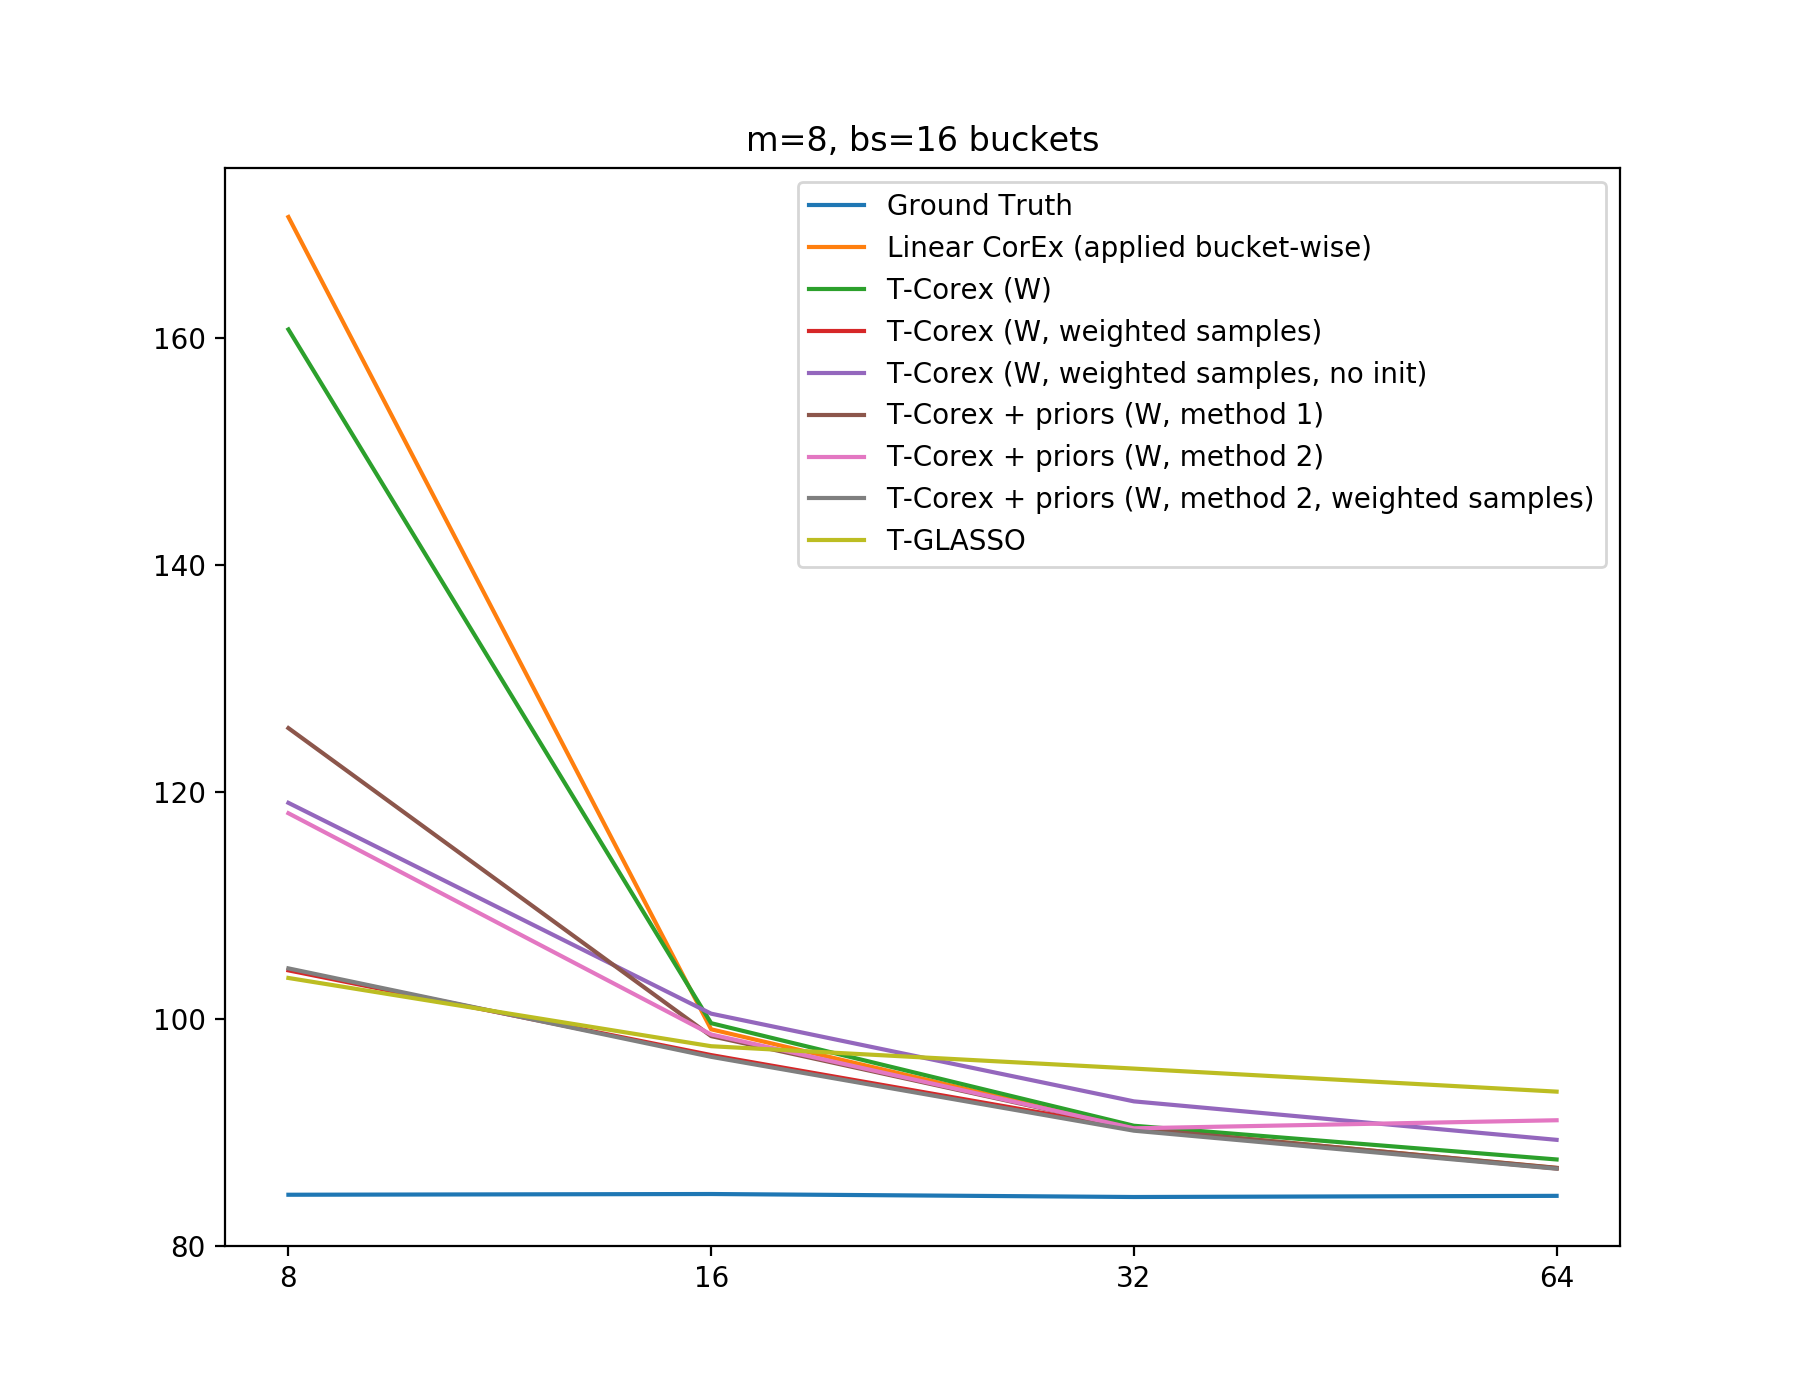

In [19]:
visualize_case(A1_C1, 'm=8, bs=16 buckets')

<IPython.core.display.Javascript object>


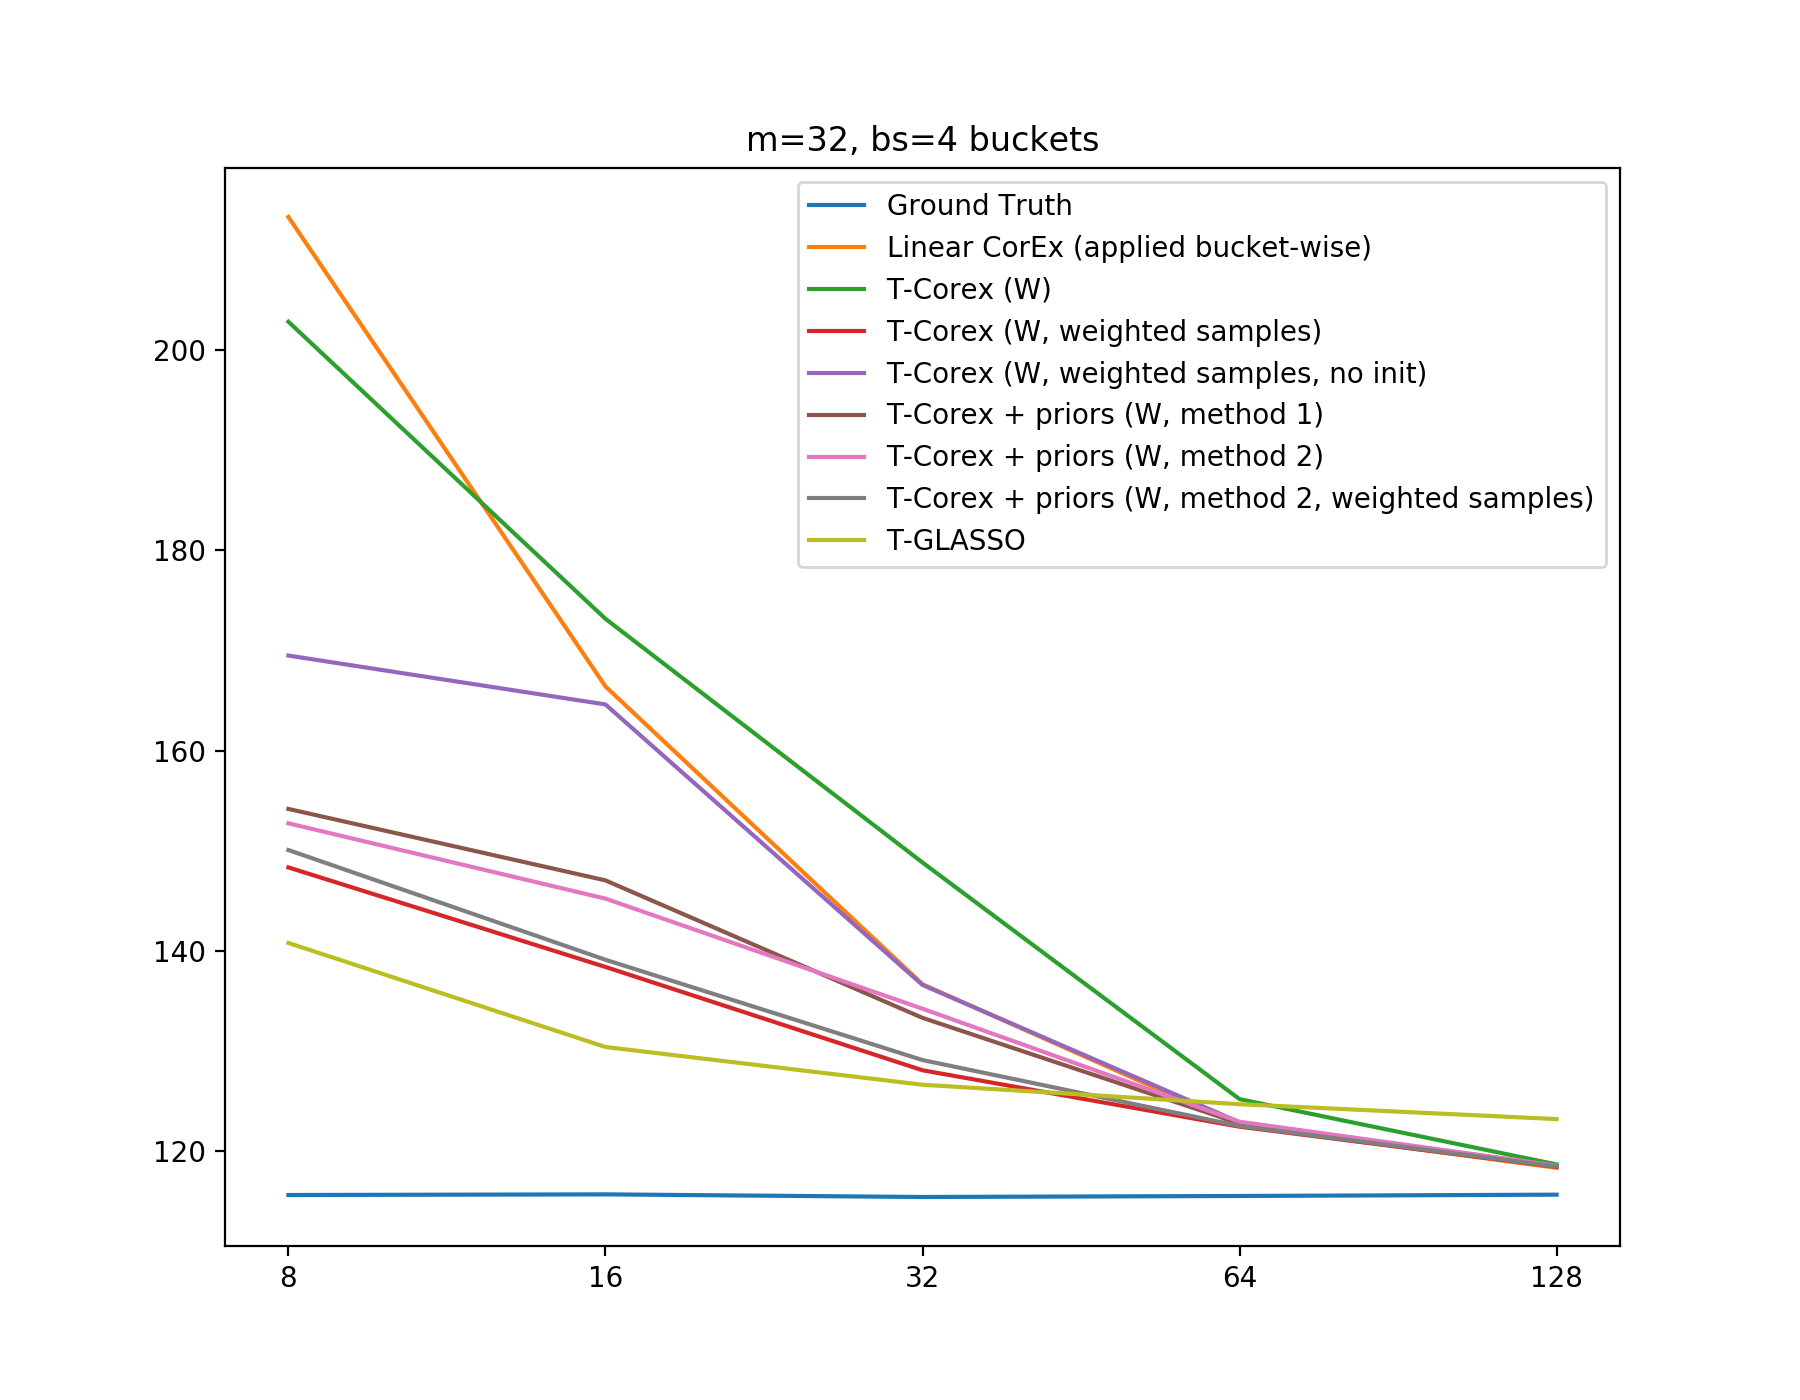

In [21]:
visualize_case(A2_C1, 'm=32, bs=4 buckets')

<IPython.core.display.Javascript object>


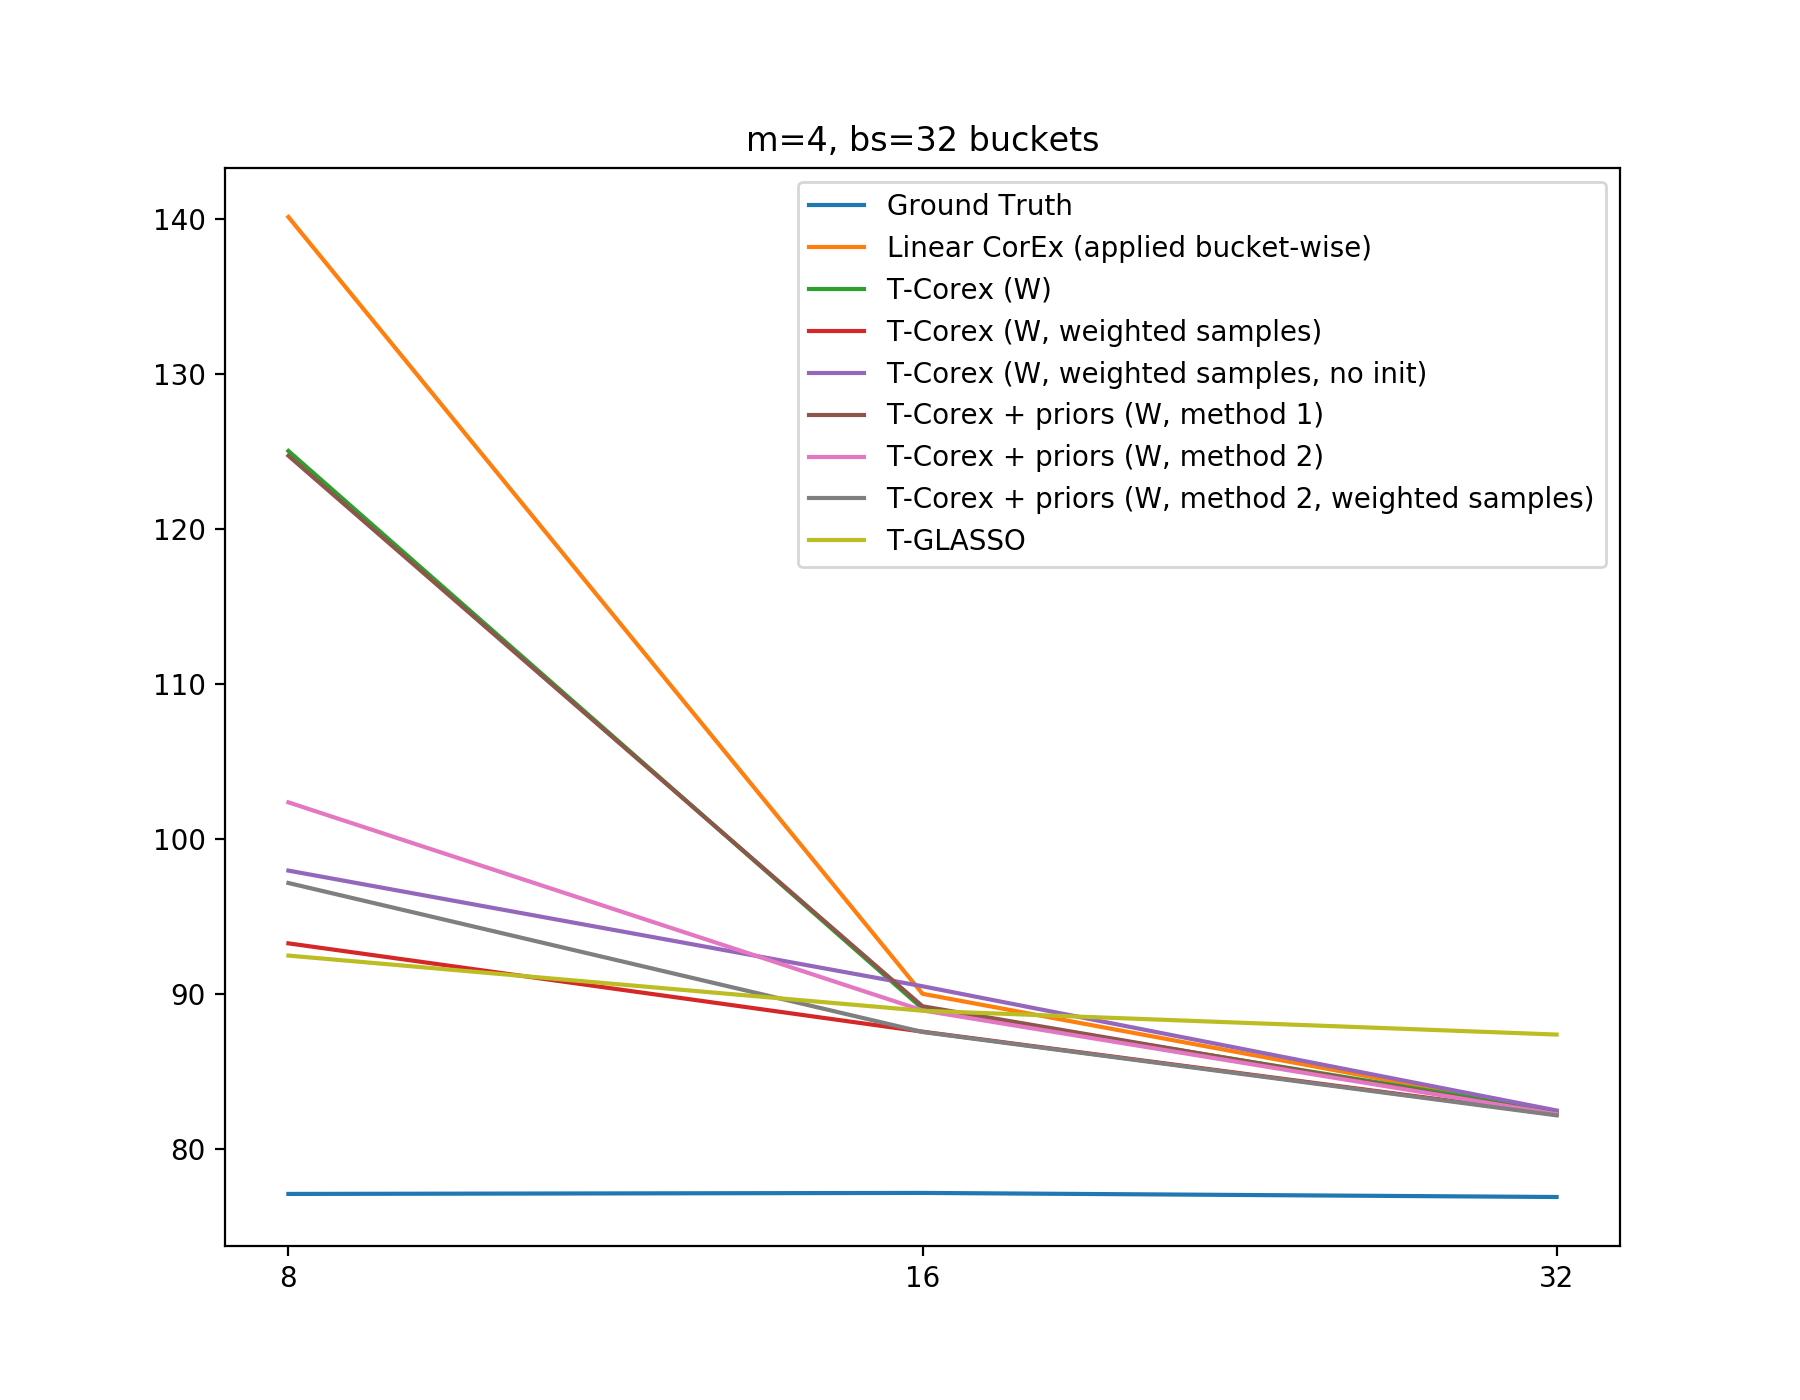

In [22]:
visualize_case(A3_C1, 'm=4, bs=32 buckets')

In [ ]:
visualize_case(A1_C3, 'm=8, bs=16 time-series')

<IPython.core.display.Javascript object>


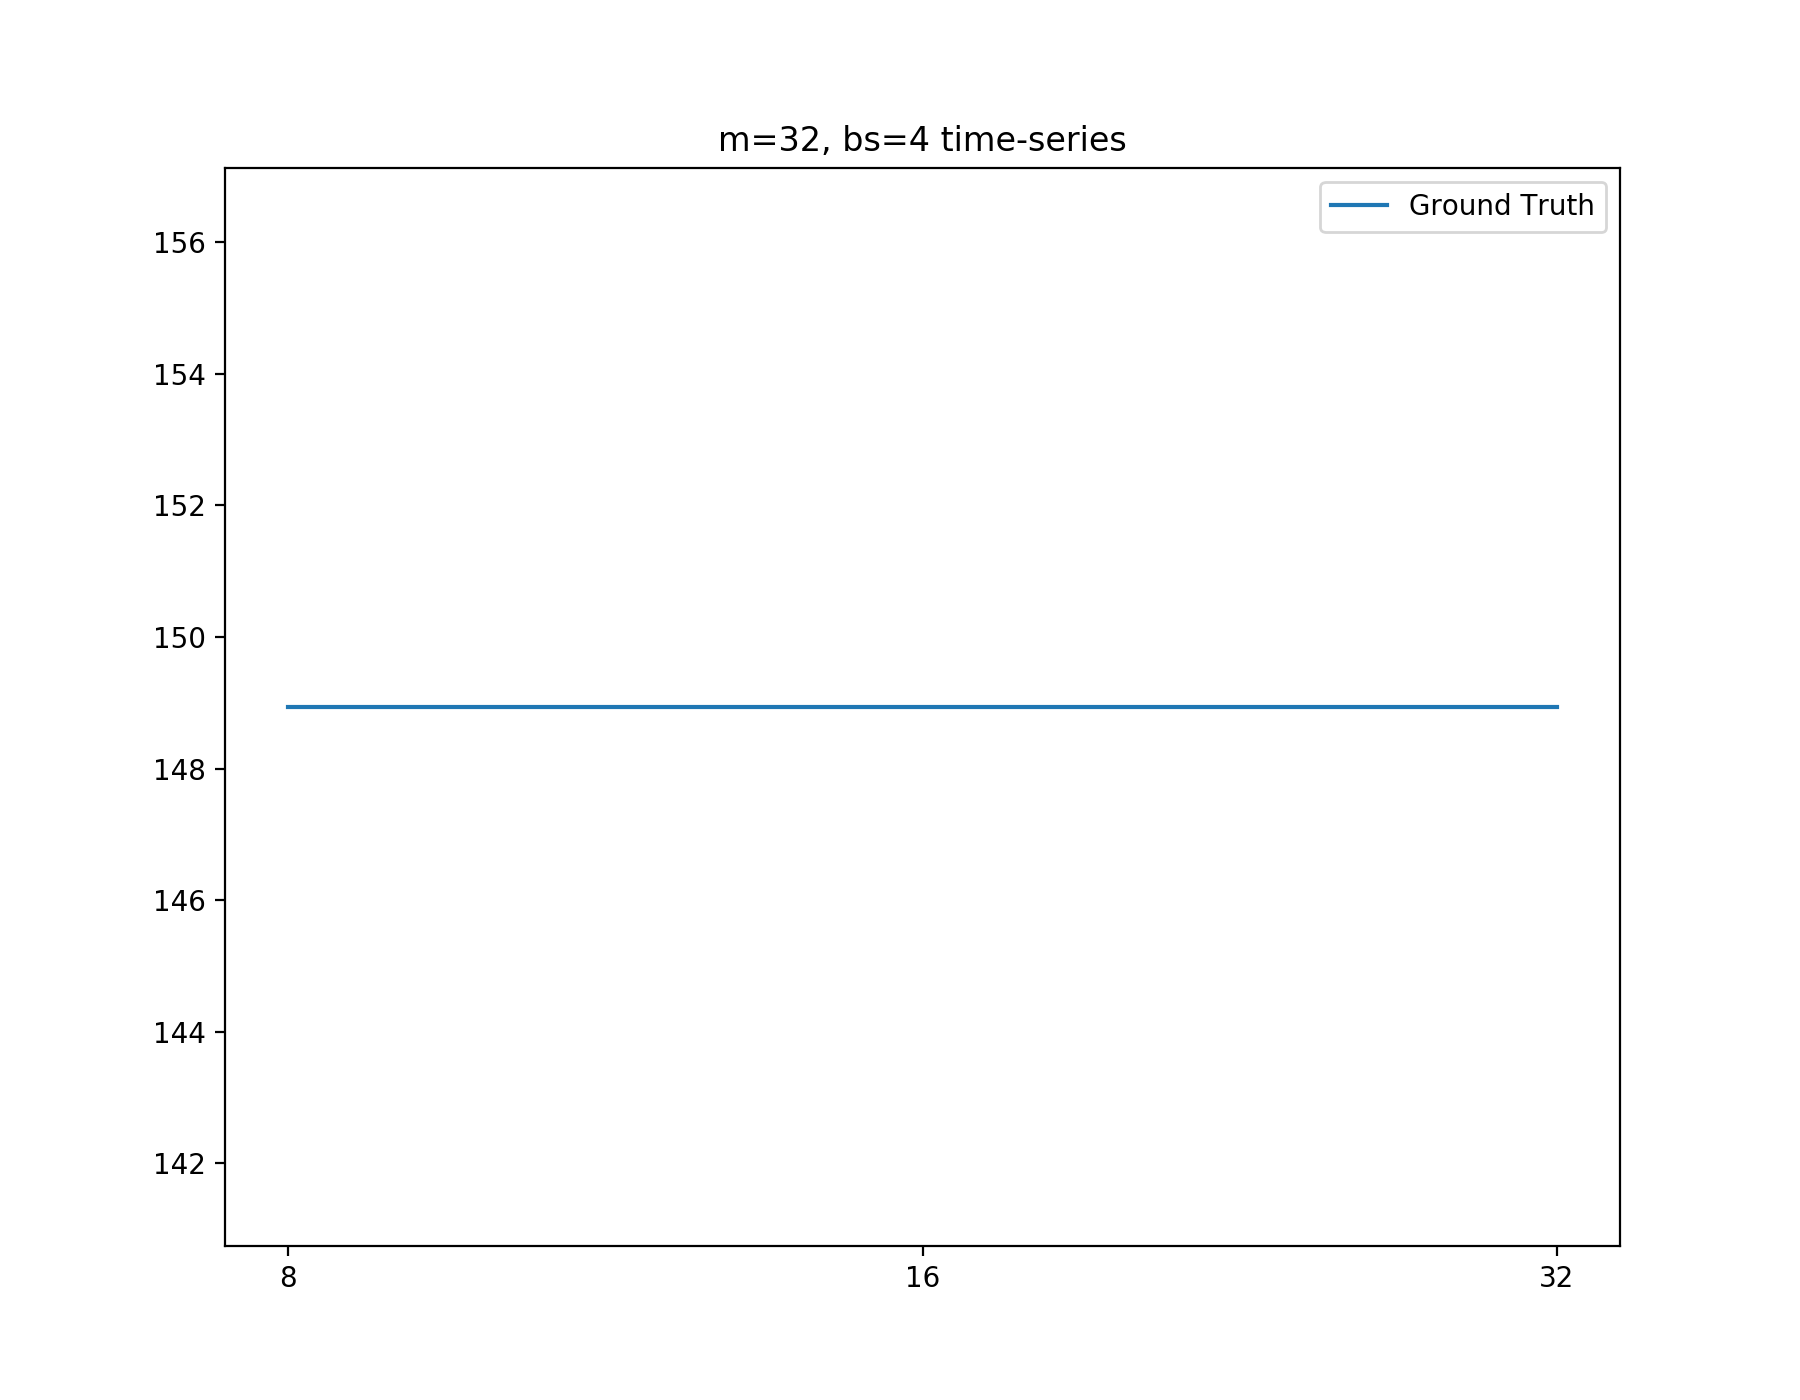

In [38]:
visualize_case(A2_C3, 'm=32, bs=4 time-series')

<IPython.core.display.Javascript object>


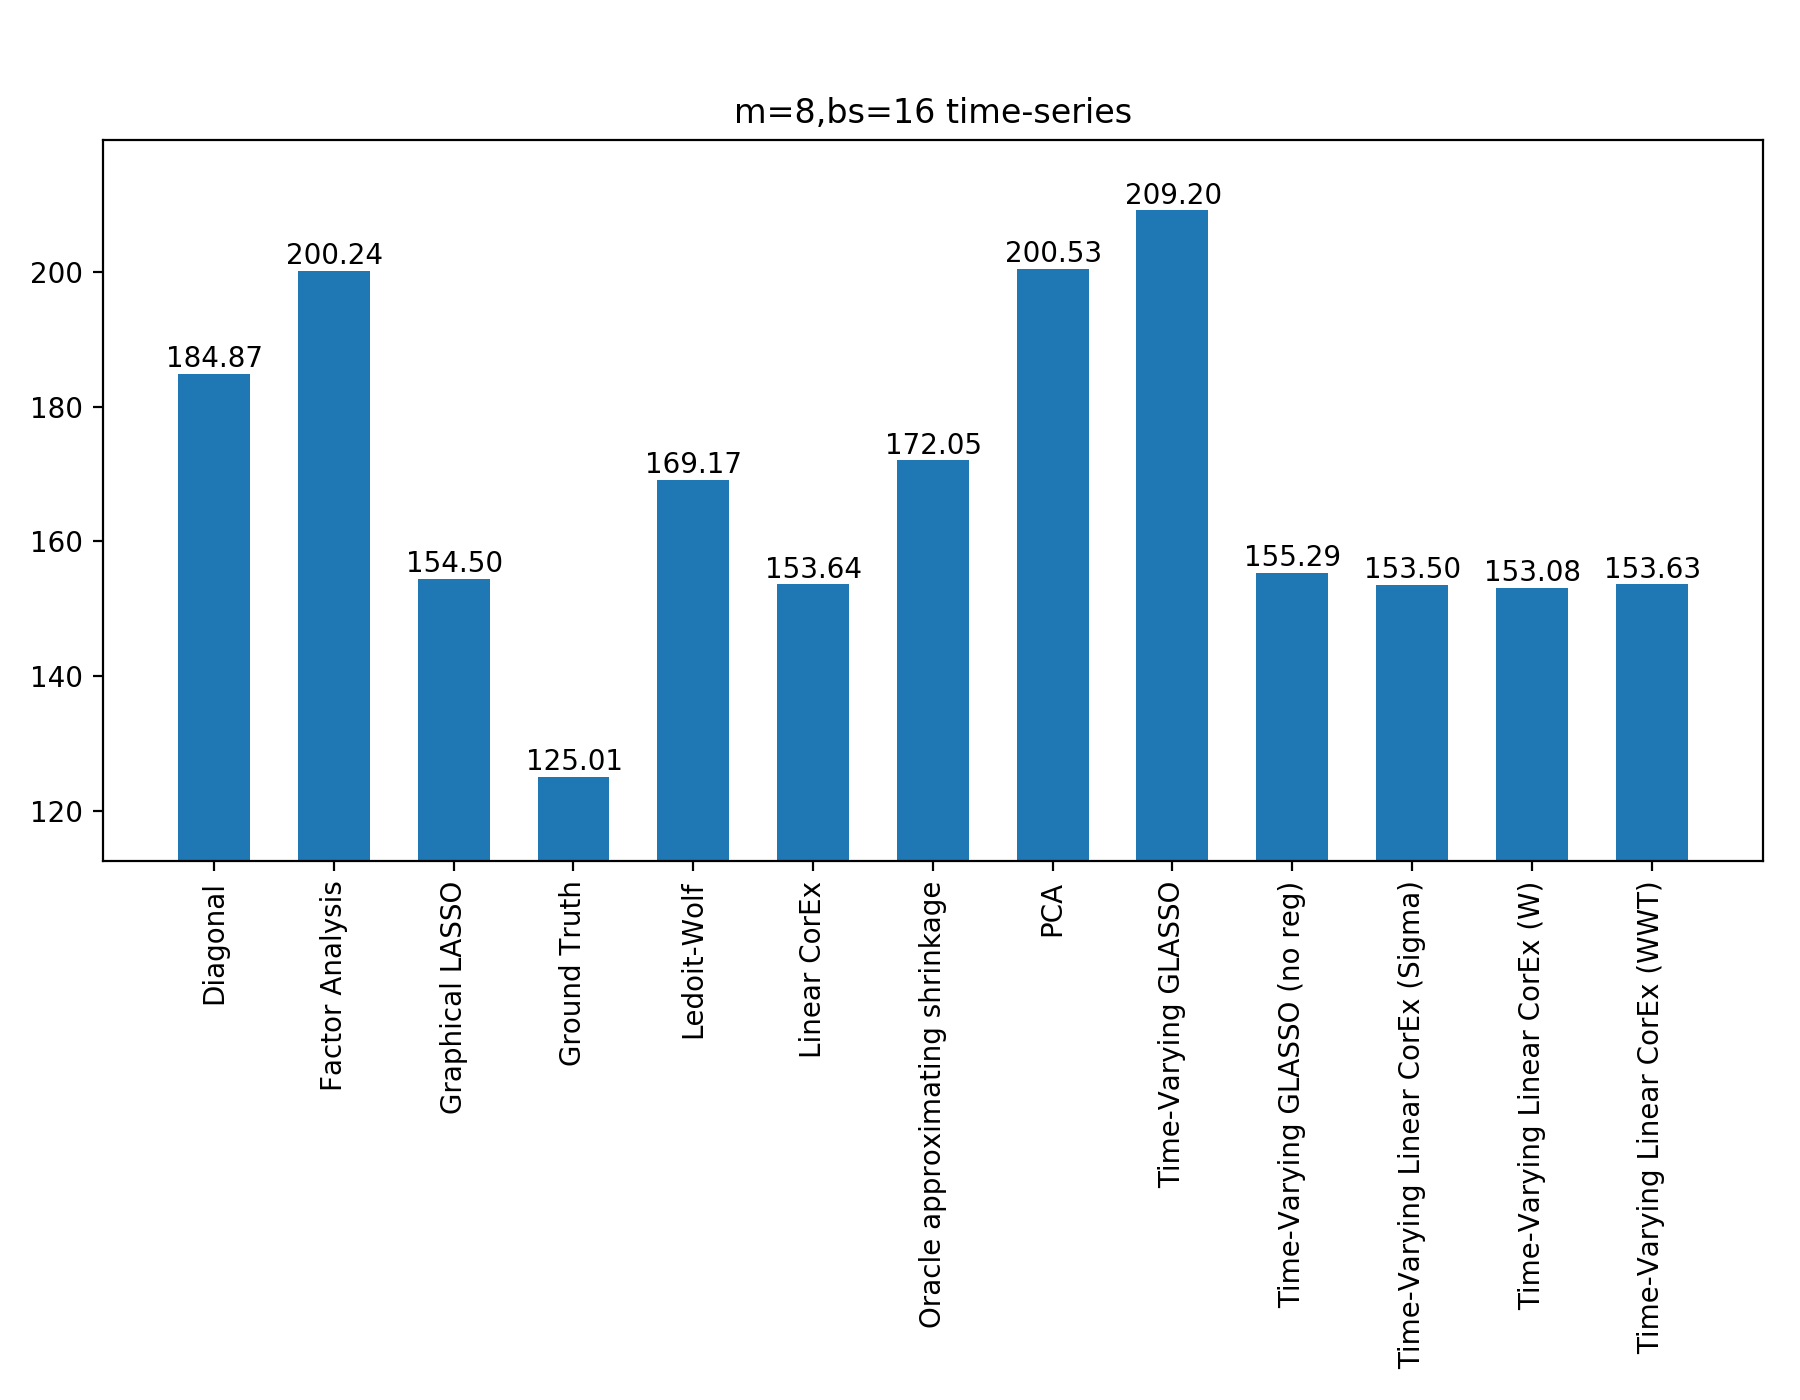

In [42]:
bar_plot_baselines(A1_C3[0], "m=8,bs=16 time-series")

<IPython.core.display.Javascript object>


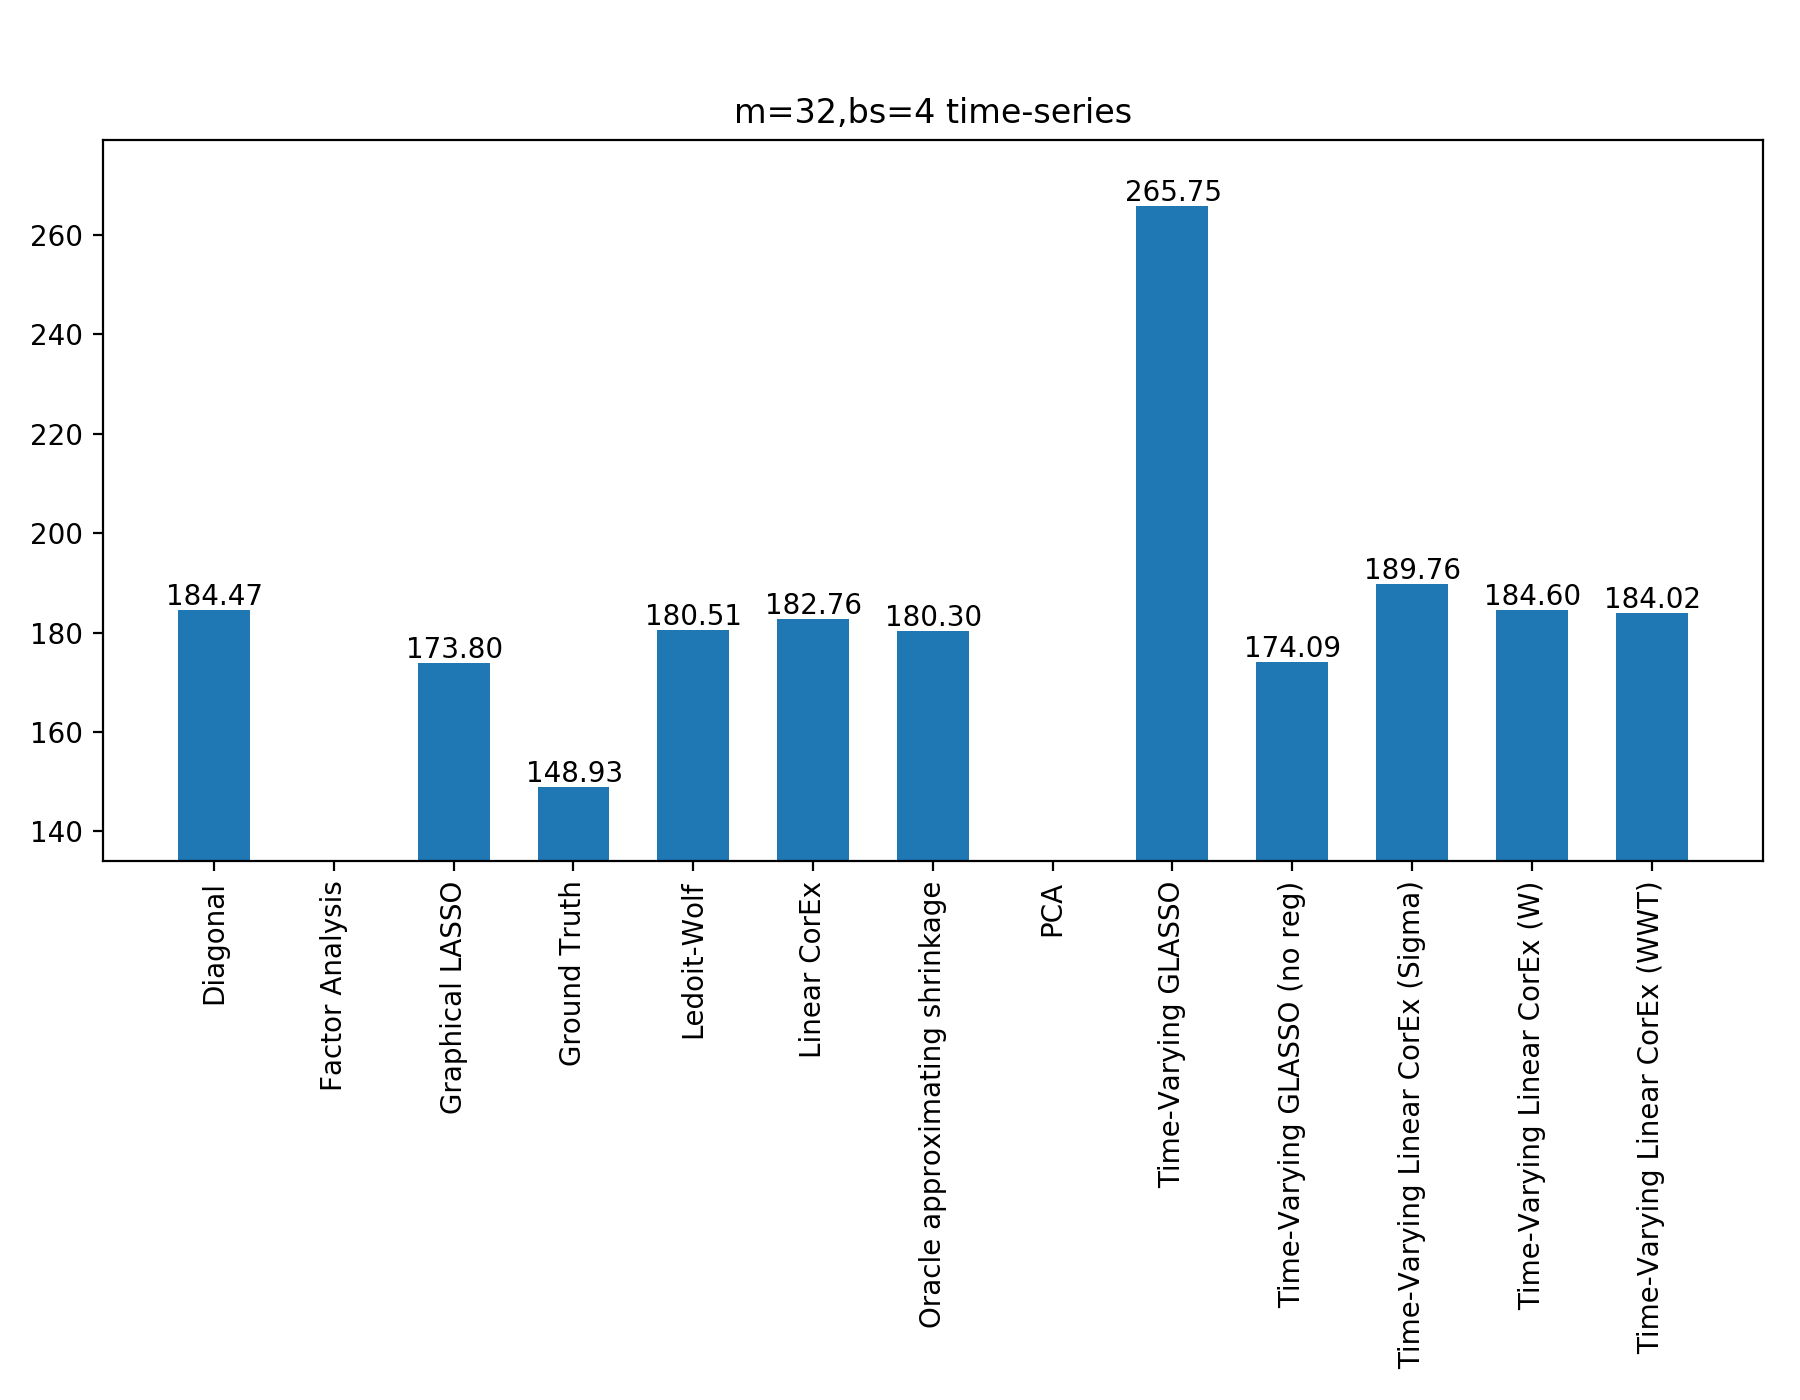

In [43]:
bar_plot_baselines(A2_C3[1], "m=32,bs=4 time-series")

In [46]:
A1_C1_change_structure = [
    'results/change_structure.syn_nglf_buckets.nt10.m8.bs16.train_cnt16.val_cnt16.test_cnt100.min_cor0.60.max_cor1.00.results.json',
    'results/change_structure.syn_nglf_buckets.nt10.m8.bs16.train_cnt32.val_cnt16.test_cnt100.min_cor0.60.max_cor1.00.results.json',
    'results/change_structure.syn_nglf_buckets.nt10.m8.bs16.train_cnt8.val_cnt16.test_cnt100.min_cor0.60.max_cor1.00.results.json'
]

<IPython.core.display.Javascript object>


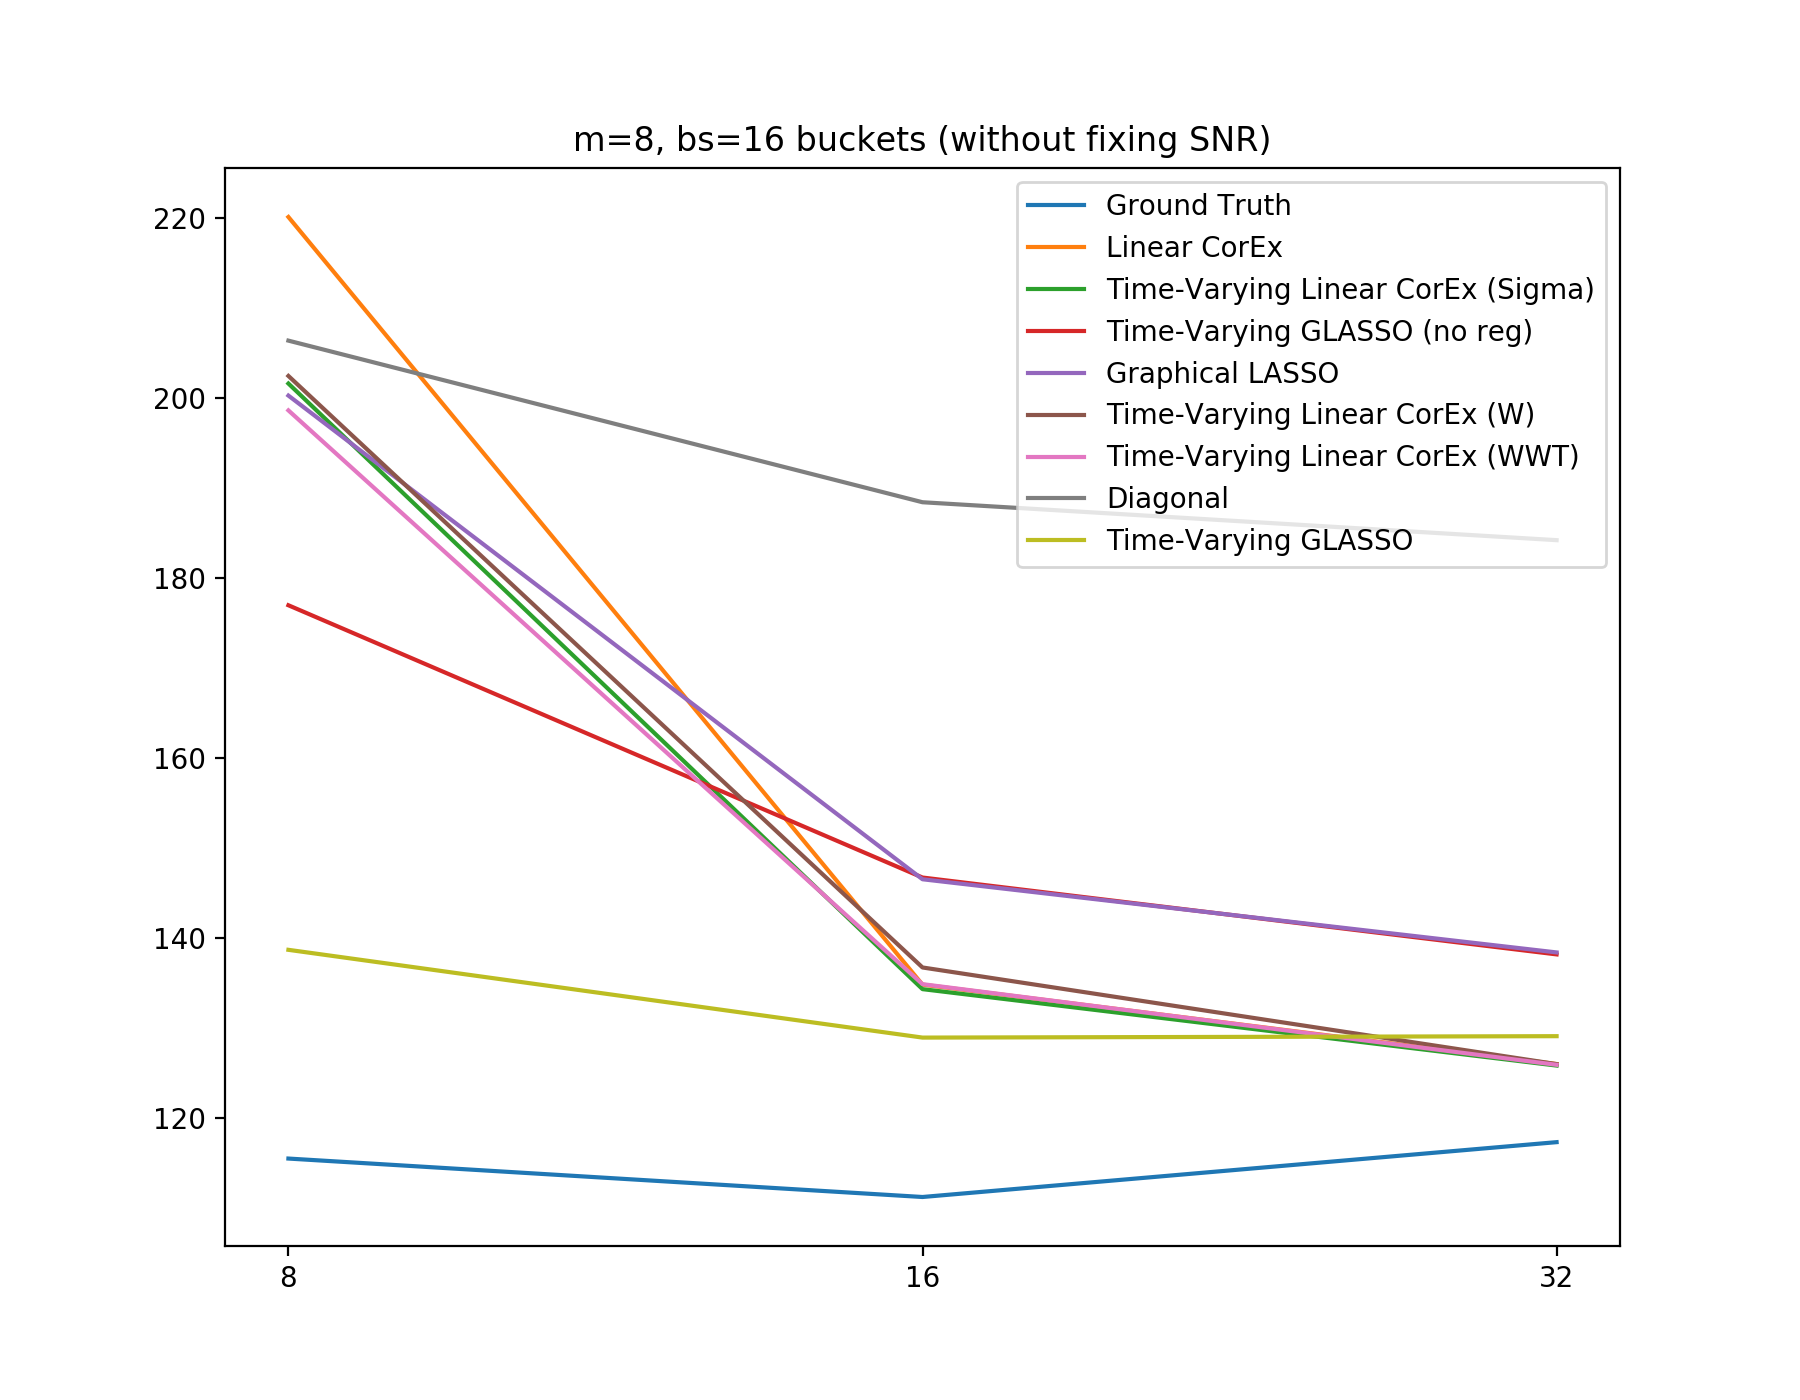

In [47]:
visualize_case(A1_C1_change_structure, 'm=8, bs=16 buckets (without fixing SNR)')

# draft

<IPython.core.display.Javascript object>


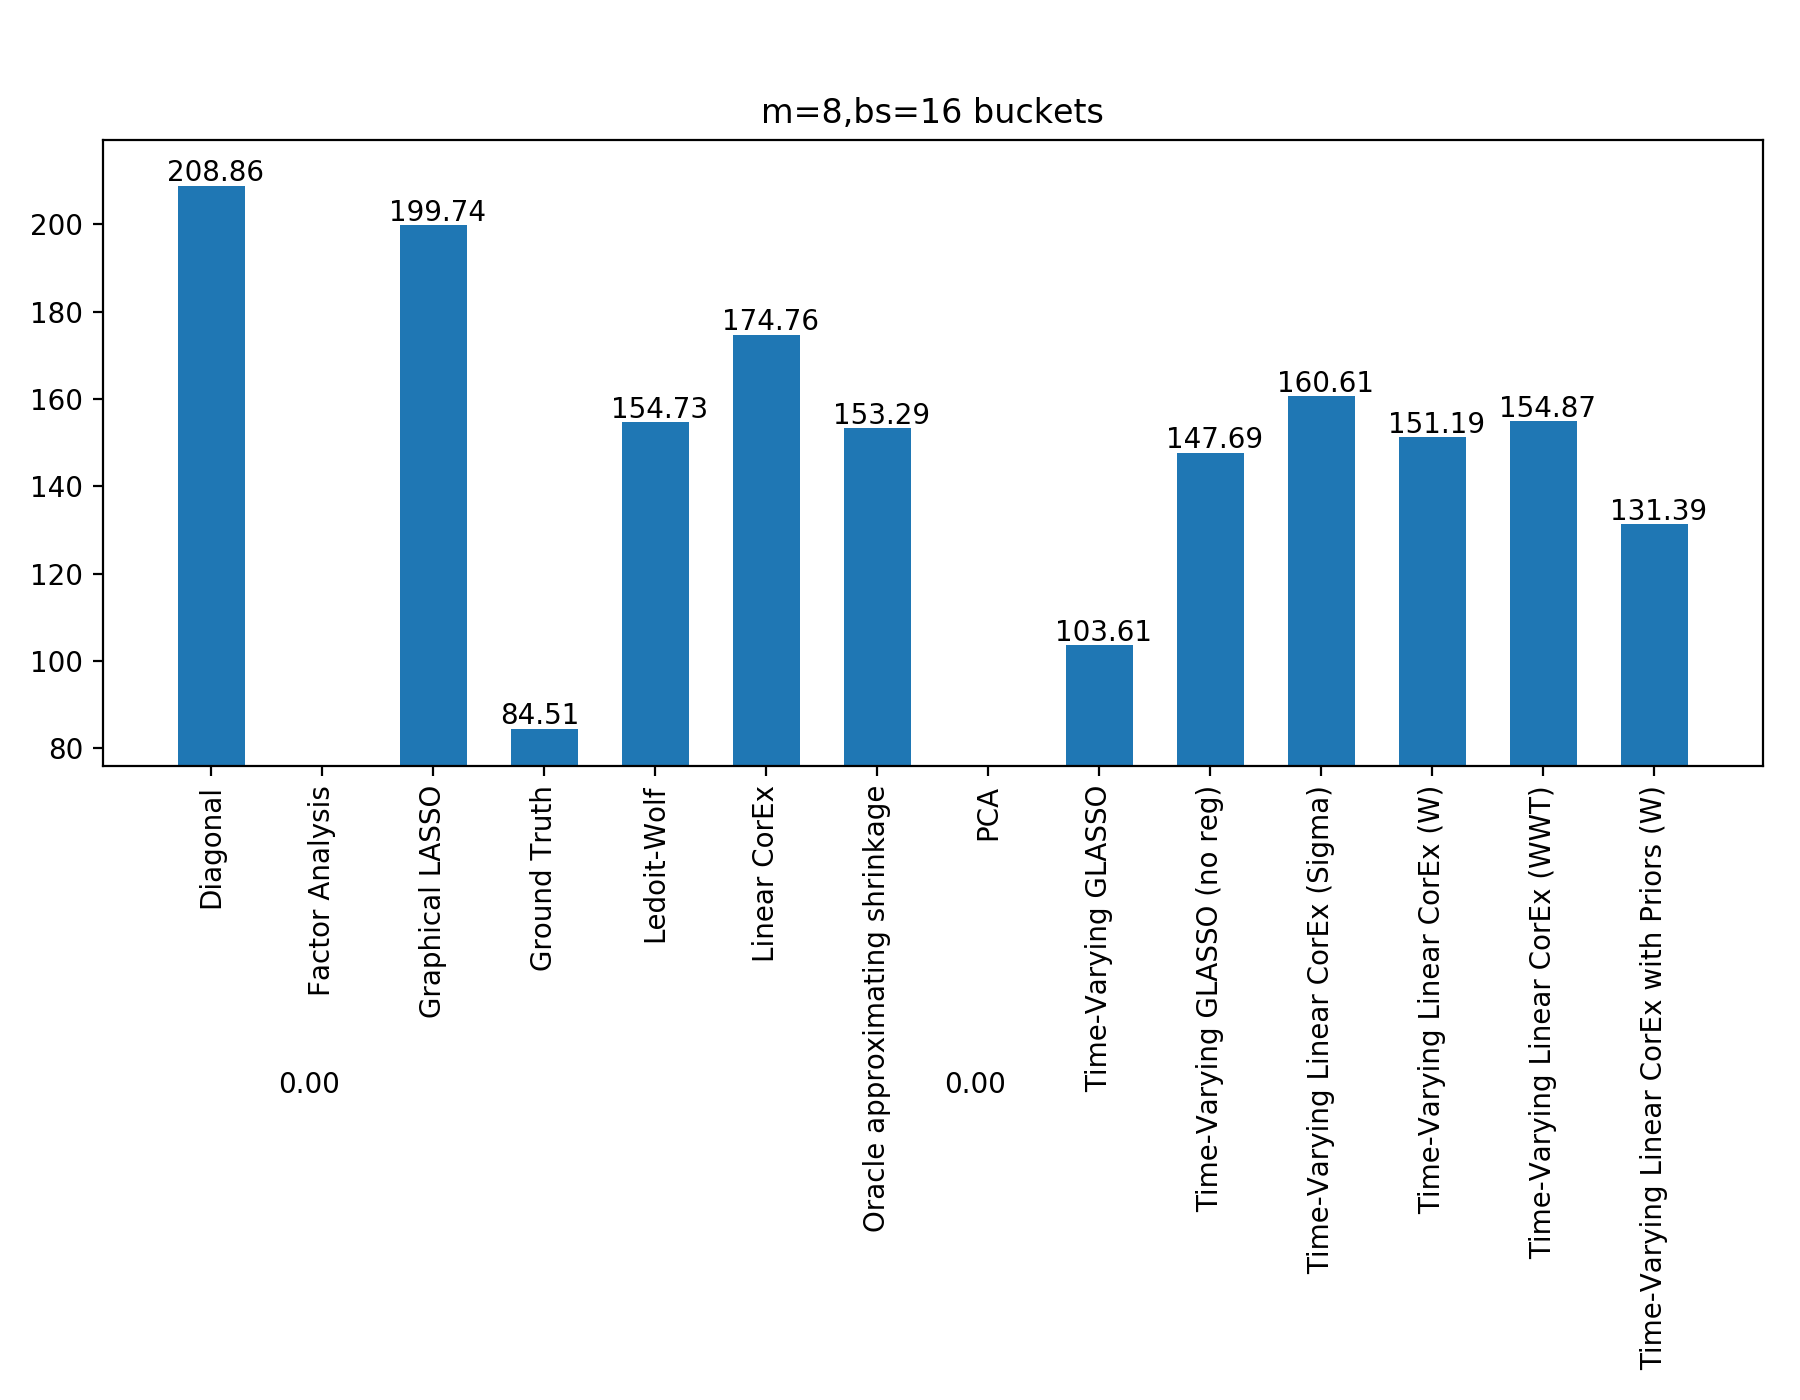

In [64]:
bar_plot_baselines('results/syn_nglf_buckets.nt10.m8.bs16.train_cnt8.val_cnt16.test_cnt100.snr5.00.results.json',
                   'm=8,bs=16 buckets')